# PROBLEM STATEMENT
The challenge faced by energy companies lies in the unpredictability of equipment
failures, leading to unexpected downtime and substantial maintenance expenses.
Reactive maintenance practices are not only costly but also result in operational
disruptions. There is a pressing need for a proactive and data-driven approach to
predict potential failures in equipment, enabling timely interventions and reducing
overall maintenance expenditures.

# OBJECTIVES
1. Enhance Operational Resilience: Acquire and refine turbine and generator sensor data, ensuring its authenticity and relevance to real-world operating scenarios.
2. Optimize Data Quality: Implement robust data cleaning and preprocessing techniques to fortify the dataset's reliability, ensuring accurate insights for strategic decision-making.
3. Strategic Insights through Analysis: Leverage Exploratory Data Analysis (EDA) to extract actionable insights from equipment performance data, providing a foundation for informed decision-making.
4. Proactive Maintenance Implementation: Develop and deploy machine learning models to predict potential equipment failures, empowering the implementation of proactive maintenance strategies.
5. Performance Validation: Rigorously evaluate the predictive maintenance model's performance, aligning it with business objectives to ensure precision and cost-effectiveness in maintenance planning.
6. Seamless Integration for Impact: Integrate the predictive maintenance model seamlessly into operational workflows, strategically minimizing downtime and optimizing resource allocation for tangible business benefits.

# DATA DICTIONARY
- Timestamp: Date and time of the sensor data readings.
- Sensor1, Sensor2, Sensor3: Various sensor readings from the equipment.
- Temperature: Temperature readings from the equipment.
- Pressure: Pressure measurements associated with the equipment's operation.
- Vibration: Vibration levels recorded during equipment operation.
- Failure Indicator (Target): Binary indicator (0 or 1) representing whether a failure occurred (1) or not (0) during a specific time period.

In [1]:
# Import libraries
import pandas as pd # Data analysis
import numpy as np # Data analysis
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline
import seaborn as sns # Data visualization
from collections import Counter # Counting
import missingno as msno # Missing Data visualization

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries, which are Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
#from sklearn.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluaton metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
energy_df = pd.read_csv(r"/Users/WaliNelson/Downloads/energy_sector_data.csv")
energy_df.head(30)

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator
0,0.582781,-0.052198,0.733755,1.609097,-0.148087,-0.148070,01/01/2023 00:00,0
1,1.666424,0.854646,-0.382263,0.629772,-0.376206,-0.378518,01/01/2023 01:00,0
2,0.330318,-1.824924,-1.636562,-0.473931,-0.924475,0.402603,01/01/2023 02:00,0
3,-0.818523,-1.322803,1.555150,-0.136275,0.157029,-1.335247,01/01/2023 03:00,0
4,-0.453737,0.201568,-1.060348,0.466344,-0.509993,-0.201048,01/01/2023 04:00,0
5,-0.509916,1.944068,0.078293,-0.965921,0.914335,-1.129053,01/01/2023 05:00,0
6,0.301799,-1.866735,-1.235251,0.289796,0.831401,0.264303,01/01/2023 06:00,0
7,-0.021569,-0.207024,-1.384442,-0.625765,-0.366559,1.151202,01/01/2023 07:00,0
8,0.438843,-1.667816,0.419308,-0.289858,-0.581698,0.706901,01/01/2023 08:00,0
9,1.127369,1.027649,-0.742849,-0.212843,0.427632,1.071914,01/01/2023 09:00,0


In [3]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sensor1            8475 non-null   float64
 1   Sensor2            8475 non-null   float64
 2   Sensor3            8475 non-null   float64
 3   Temperature        8475 non-null   float64
 4   Pressure           8475 non-null   float64
 5   Vibration          8475 non-null   float64
 6   Timestamp          8737 non-null   object 
 7   Failure_Indicator  8737 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 546.2+ KB


In [4]:
# Check for missing values in the entire DataFrame
missing_values = energy_df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

# Alternatively, you can calculate the percentage of missing values in each column
missing_percentage = (energy_df.isnull().sum() / len(energy_df)) * 100

# Display the percentage of missing values for each column
print("\nPercentage of missing values per column:")
print(missing_percentage)


Missing values per column:
Sensor1              262
Sensor2              262
Sensor3              262
Temperature          262
Pressure             262
Vibration            262
Timestamp              0
Failure_Indicator      0
dtype: int64

Percentage of missing values per column:
Sensor1              2.998741
Sensor2              2.998741
Sensor3              2.998741
Temperature          2.998741
Pressure             2.998741
Vibration            2.998741
Timestamp            0.000000
Failure_Indicator    0.000000
dtype: float64


<Axes: >

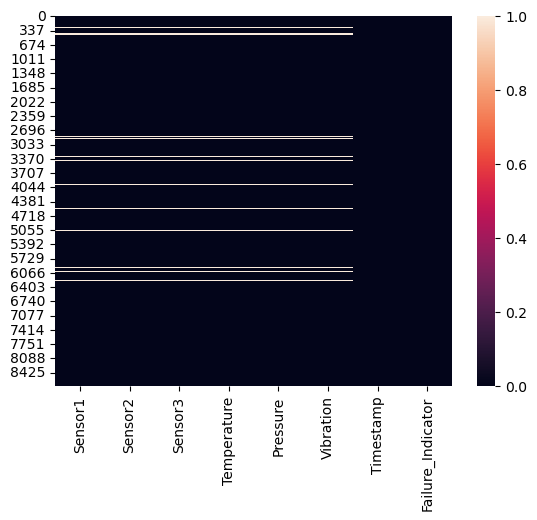

In [5]:
# Visualizing the missing values

sns.heatmap(energy_df.isnull())

In [6]:
# Convert the columns 'Timestamp' to datetime format

energy_df['Timestamp'] = pd.to_datetime(energy_df['Timestamp'])

In [7]:
# Dropping rows with missing values because there are less that 3% of missing values in the features that have missing values

energy = energy_df.dropna()

energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8736
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sensor1            8475 non-null   float64       
 1   Sensor2            8475 non-null   float64       
 2   Sensor3            8475 non-null   float64       
 3   Temperature        8475 non-null   float64       
 4   Pressure           8475 non-null   float64       
 5   Vibration          8475 non-null   float64       
 6   Timestamp          8475 non-null   datetime64[ns]
 7   Failure_Indicator  8475 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 595.9 KB


In [8]:
energy.head()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator
0,0.582781,-0.052198,0.733755,1.609097,-0.148087,-0.148070,2023-01-01 00:00:00,0
1,1.666424,0.854646,-0.382263,0.629772,-0.376206,-0.378518,2023-01-01 01:00:00,0
2,0.330318,-1.824924,-1.636562,-0.473931,-0.924475,0.402603,2023-01-01 02:00:00,0
3,-0.818523,-1.322803,1.555150,-0.136275,0.157029,-1.335247,2023-01-01 03:00:00,0
4,-0.453737,0.201568,-1.060348,0.466344,-0.509993,-0.201048,2023-01-01 04:00:00,0


In [9]:
energy.describe()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Failure_Indicator
count,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000
mean,5.195669,5.199050,5.223741,5.189753,5.194556,5.202235,0.050147
std,2.873818,2.860683,2.954809,2.892897,2.837316,2.842389,0.218262
min,-1.517032,-1.886621,-2.519942,-2.000383,-3.019938,-2.148714,0.000000
25%,3.077508,3.117879,3.102718,3.073420,3.096083,3.121385,0.000000
50%,5.061650,5.080007,5.113147,5.091203,5.078003,5.057148,0.000000
75%,7.022601,7.070223,7.020447,7.053812,7.080806,7.036503,0.000000
max,28.996865,27.106647,29.403773,26.997956,25.053947,28.683961,1.000000


<Axes: >

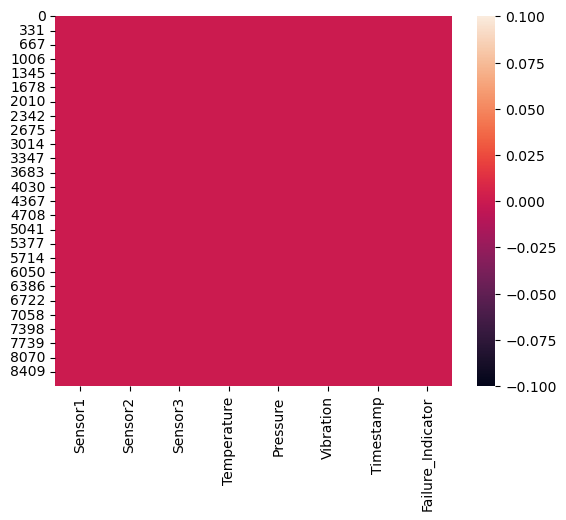

In [10]:
# Visualizing the missing values

sns.heatmap(energy.isnull())

# EXPLORATORY DATA ANALYSIS

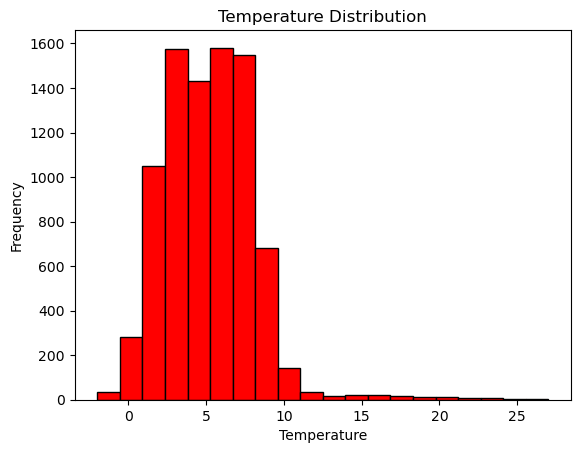

In [11]:
plt.hist(energy['Temperature'], bins=20, color='red', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


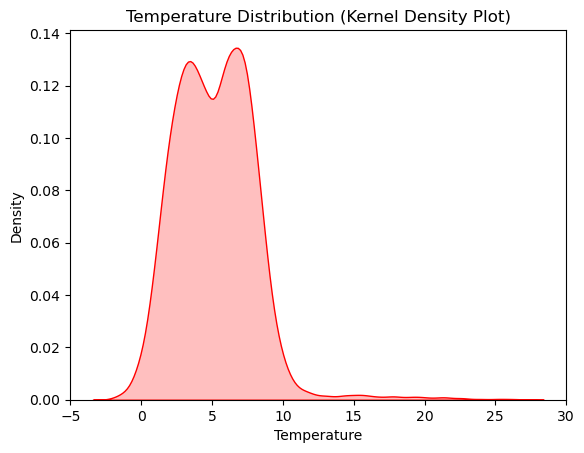

In [12]:
sns.kdeplot(energy['Temperature'], fill=True, color='red')
plt.title('Temperature Distribution (Kernel Density Plot)')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()


### Temperature vs. Pressure

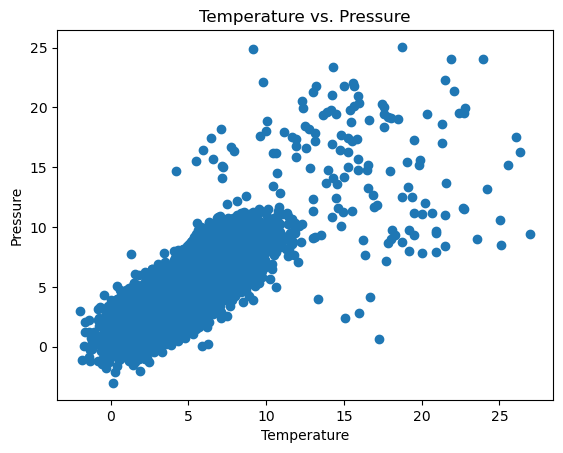

In [13]:
plt.scatter(energy['Temperature'], energy['Pressure'])
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temperature vs. Pressure')
plt.show()


### Vibration vs. Failure Indicator

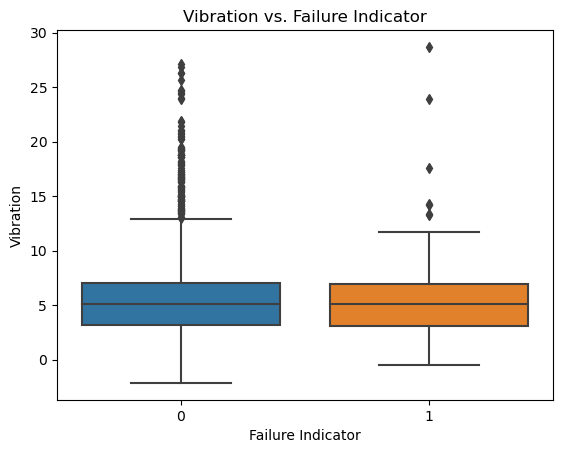

In [14]:
sns.boxplot(x='Failure_Indicator', y='Vibration', data=energy)
plt.xlabel('Failure Indicator')
plt.ylabel('Vibration')
plt.title('Vibration vs. Failure Indicator')
plt.show()

### Temperature vs. Failure Indicator

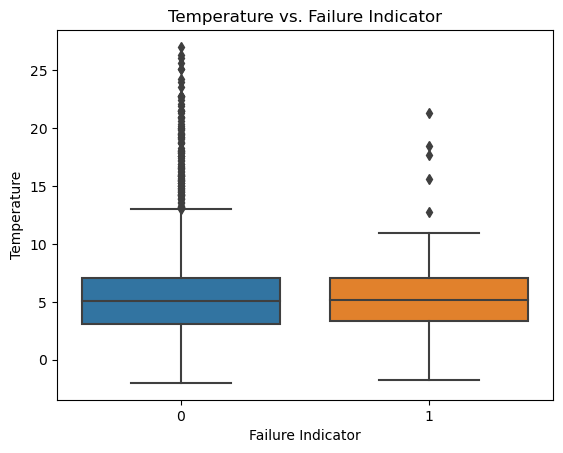

In [15]:
sns.boxplot(x='Failure_Indicator', y='Temperature', data=energy)
plt.xlabel('Failure Indicator')
plt.ylabel('Temperature')
plt.title('Temperature vs. Failure Indicator')
plt.show()

### Pressure vs. Failure Indicator

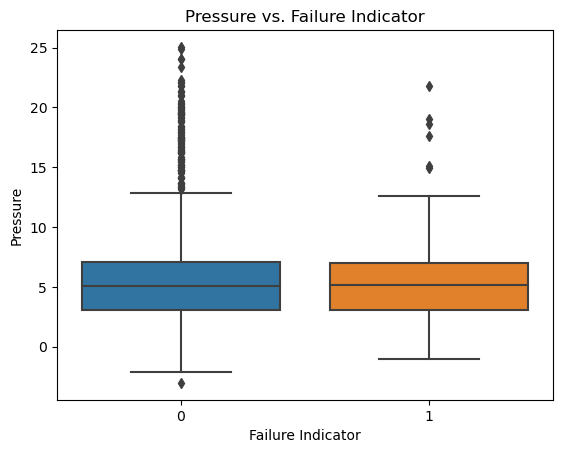

In [16]:
sns.boxplot(x='Failure_Indicator', y='Pressure', data=energy)
plt.xlabel('Failure Indicator')
plt.ylabel('Pressure')
plt.title('Pressure vs. Failure Indicator')
plt.show()

### Sensor Readings (Sensor1, Sensor2, Sensor3) vs. Failure Indicator

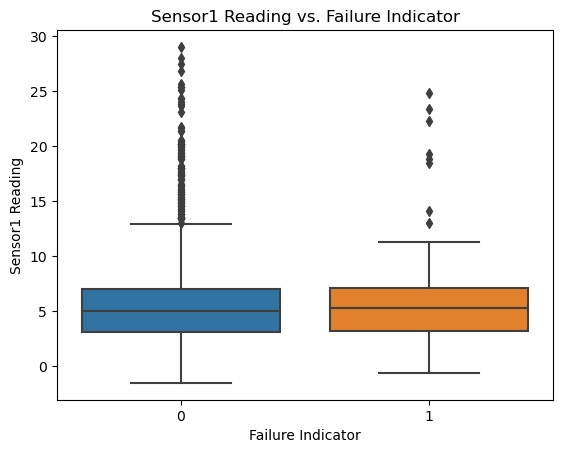

In [17]:
sns.boxplot(x='Failure_Indicator', y='Sensor1', data=energy)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor1 Reading')
plt.title('Sensor1 Reading vs. Failure Indicator')
plt.show()

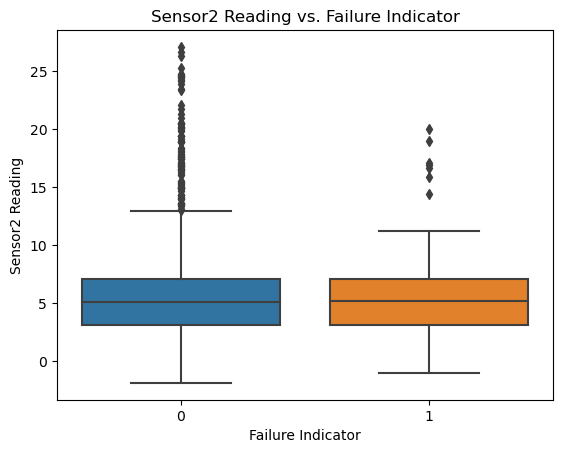

In [18]:
sns.boxplot(x='Failure_Indicator', y='Sensor2', data=energy)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor2 Reading')
plt.title('Sensor2 Reading vs. Failure Indicator')
plt.show()

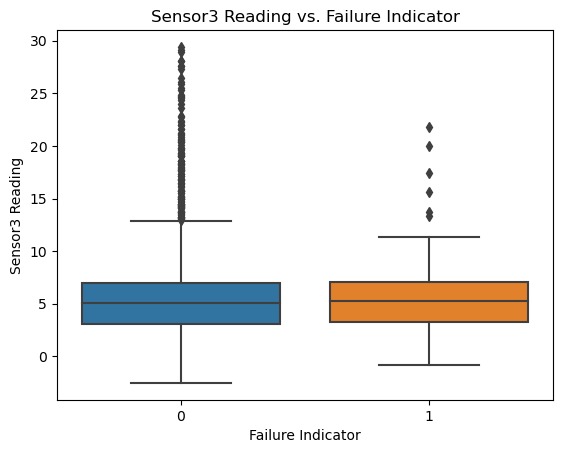

In [19]:
sns.boxplot(x='Failure_Indicator', y='Sensor3', data=energy)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor3 Reading')
plt.title('Sensor3 Reading vs. Failure Indicator')
plt.show()

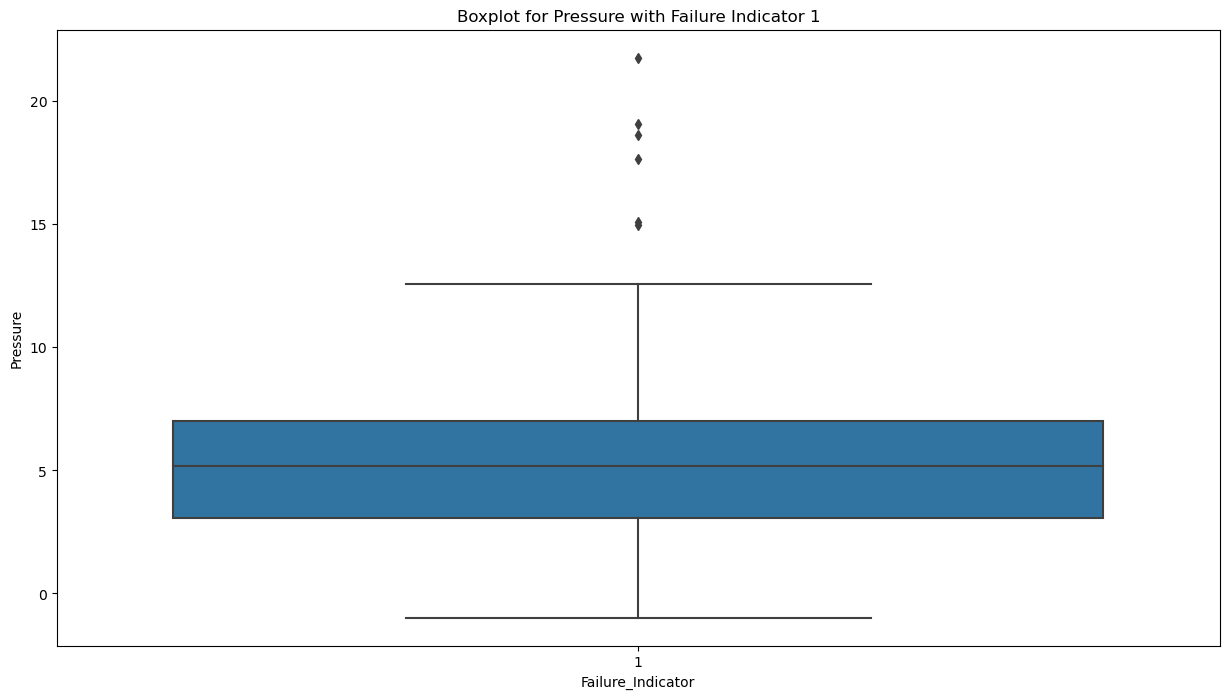

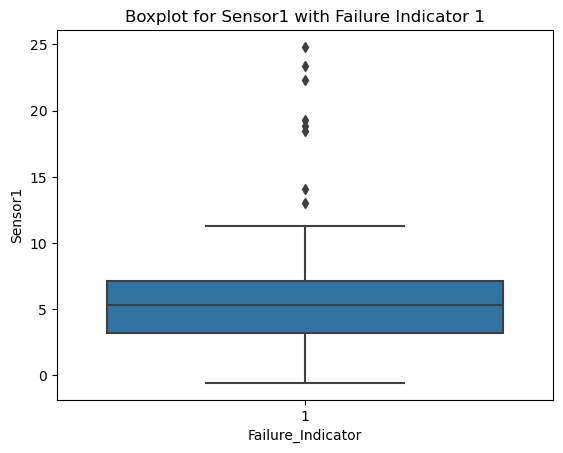

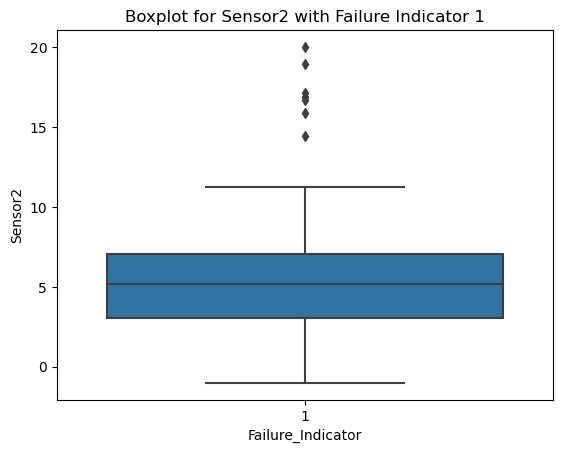

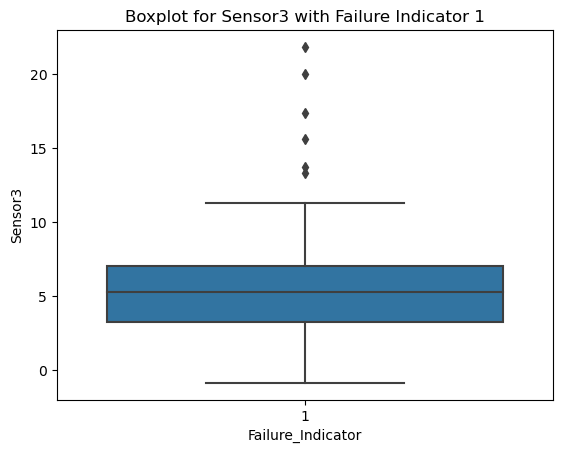

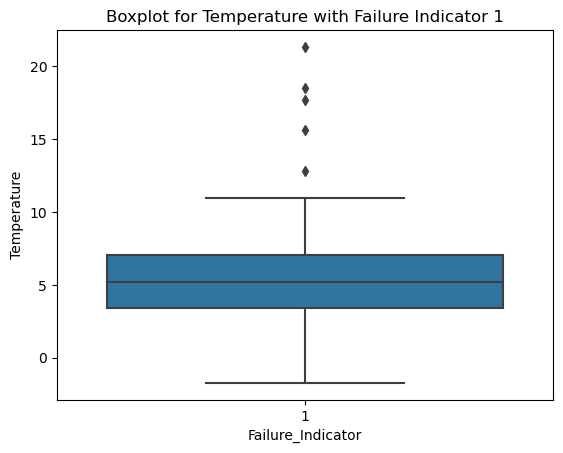

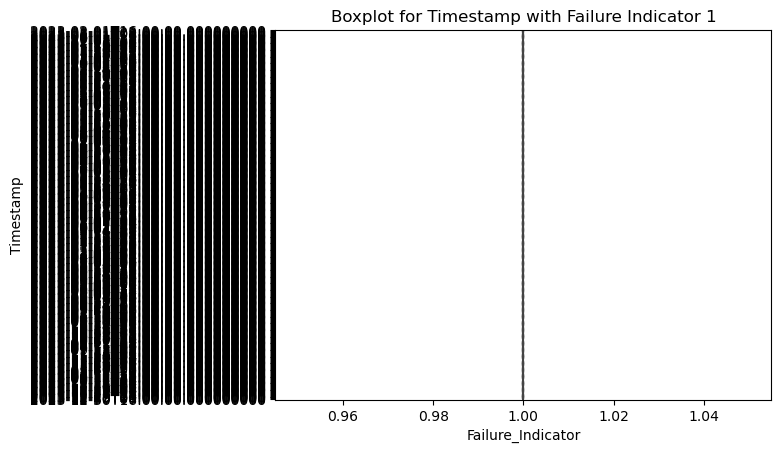

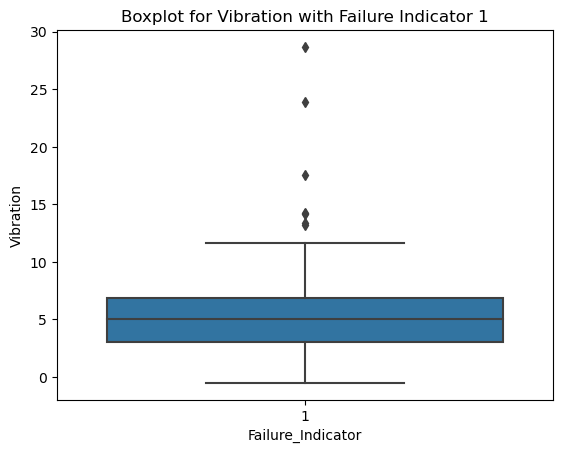

In [20]:
# Filter the data for Failure_Indicator == 1
failures_data = energy[energy['Failure_Indicator'] == 1]

# Remove 'Failure_Indicator' from the features list
features = energy.columns.difference(['Failure_Indicator'])

# Create boxplots for each feature with Failure_Indicator == 1
plt.figure(figsize=(15, 8))
for feature in features:
    sns.boxplot(x='Failure_Indicator', y=feature, data=failures_data)
    plt.title(f'Boxplot for {feature} with Failure Indicator 1')
    plt.show()


### Temperature, Pressure, and Vibration

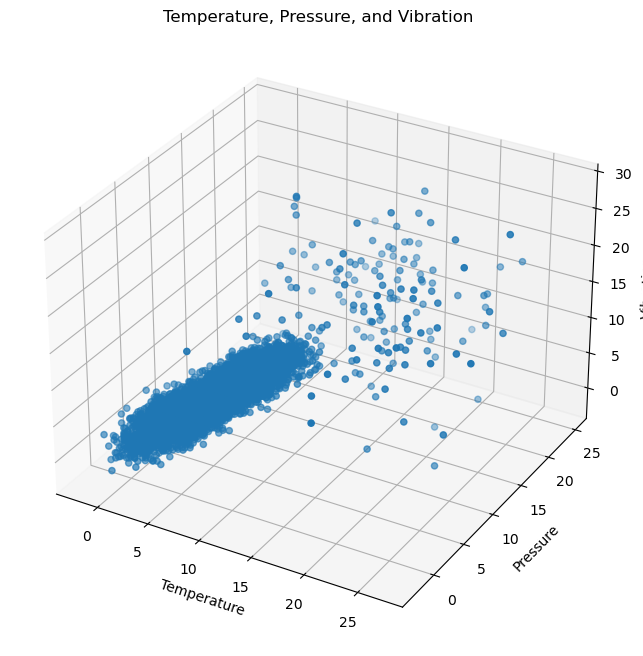

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(energy['Temperature'], energy['Pressure'], energy['Vibration'])
ax.set_xlabel('Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('Vibration')
ax.set_title('Temperature, Pressure, and Vibration')
plt.show()

### Sensor Readings vs. Temperature

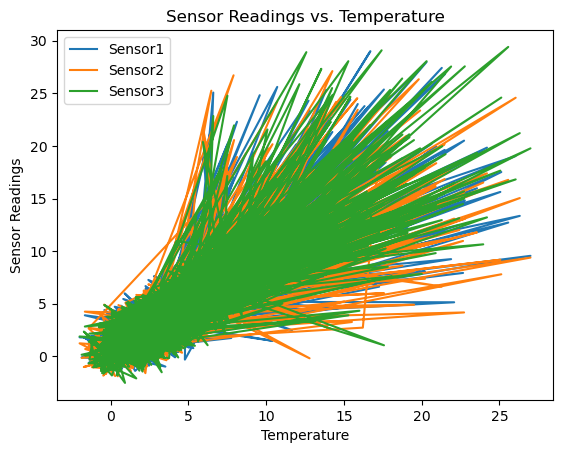

In [22]:
plt.plot(energy['Temperature'], energy['Sensor1'], label='Sensor1')
plt.plot(energy['Temperature'], energy['Sensor2'], label='Sensor2')
plt.plot(energy['Temperature'], energy['Sensor3'], label='Sensor3')
plt.xlabel('Temperature')
plt.ylabel('Sensor Readings')
plt.title('Sensor Readings vs. Temperature')
plt.legend()
plt.show()

### Temperature, Pressure, and Failure Indicator

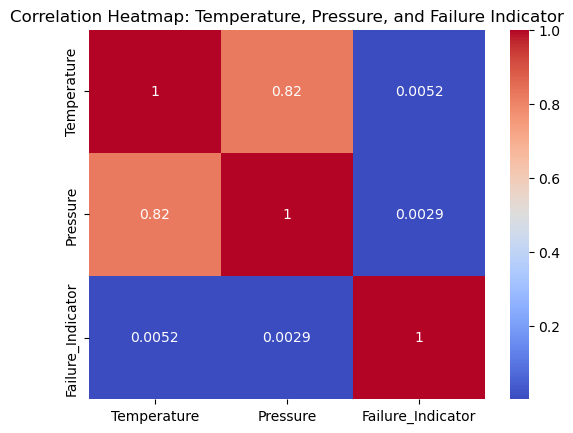

In [23]:
sns.heatmap(energy[['Temperature', 'Pressure', 'Failure_Indicator']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Temperature, Pressure, and Failure Indicator')
plt.show()

### Correlation Matrix

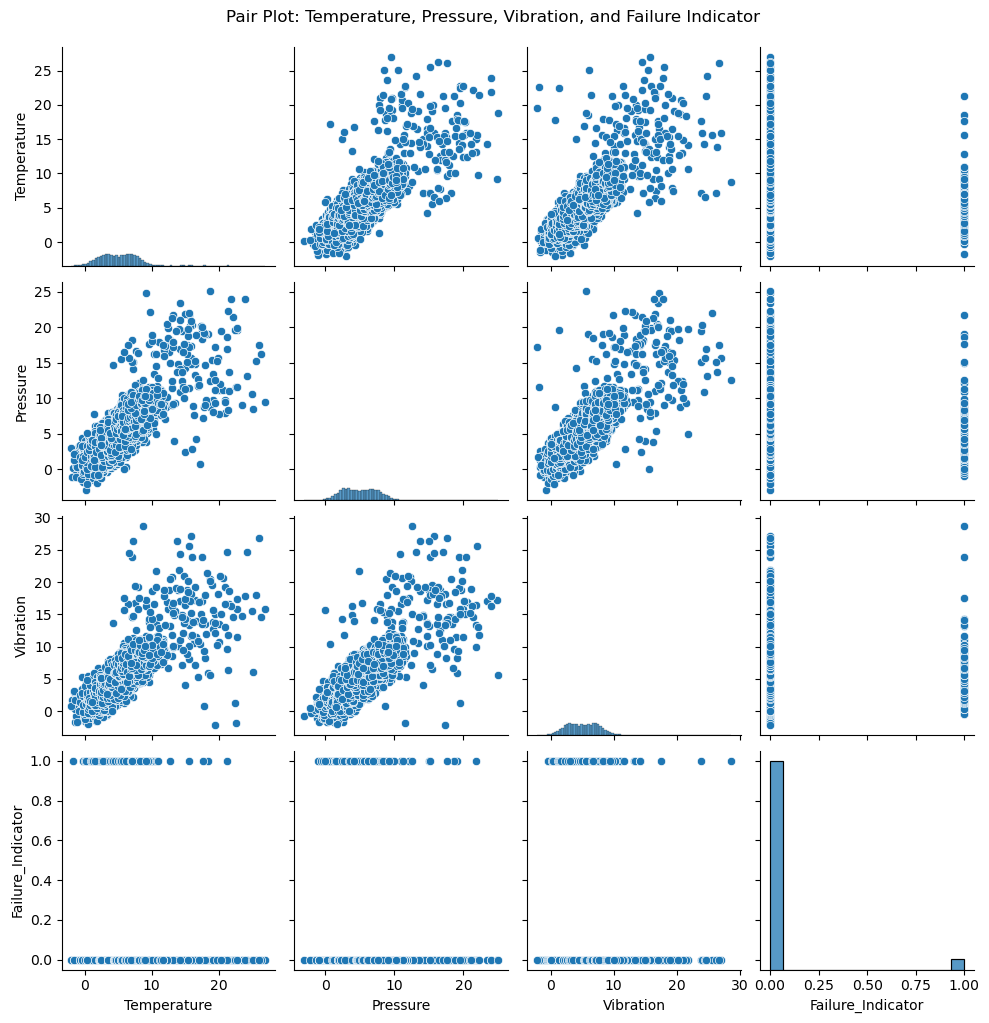

In [24]:
sns.pairplot(energy[['Temperature', 'Pressure', 'Vibration', 'Failure_Indicator']])
plt.suptitle('Pair Plot: Temperature, Pressure, Vibration, and Failure Indicator', y=1.02)
plt.show()

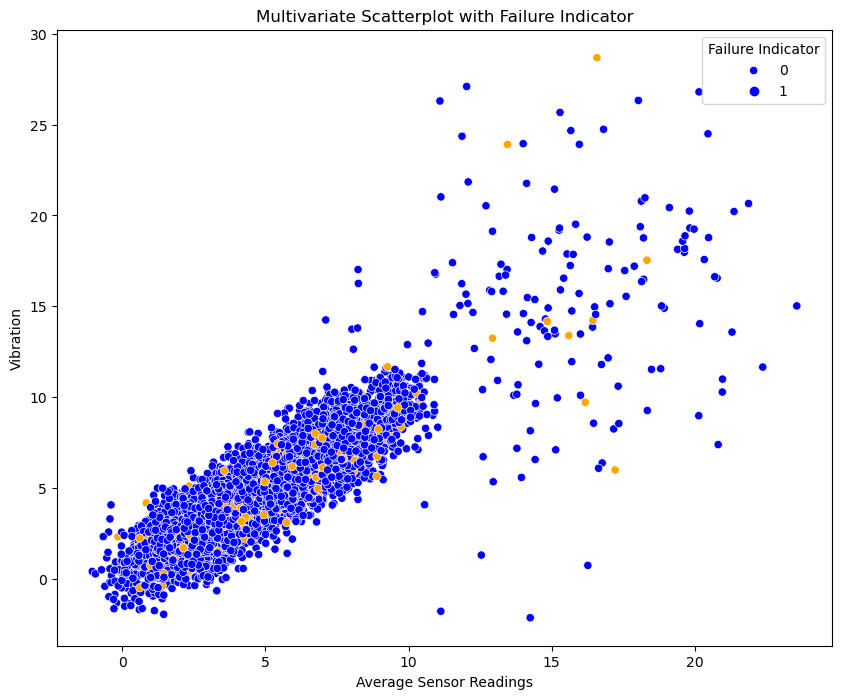

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average sensor readings
energy['Average_Sensor'] = energy[['Sensor1', 'Sensor2', 'Sensor3']].mean(axis=1)

# Plot multivariate scatterplot with hue based on Failure_Indicator
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Average_Sensor', y='Vibration', hue='Failure_Indicator', data=energy, palette={0: 'blue', 1: 'orange'})
plt.title('Multivariate Scatterplot with Failure Indicator')
plt.xlabel('Average Sensor Readings')
plt.ylabel('Vibration')
plt.legend(title='Failure Indicator', loc='upper right', labels=['0', '1'])
plt.show()


### Time Series Analysis

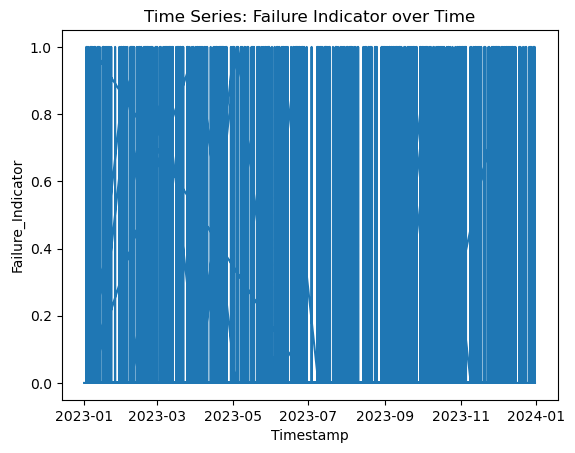

In [26]:
plt.plot(energy['Timestamp'], energy['Failure_Indicator'])
plt.xlabel('Timestamp')
plt.ylabel('Failure_Indicator')
plt.title('Time Series: Failure Indicator over Time')
plt.show()

### Number of Machine Failures Over A Period of Time

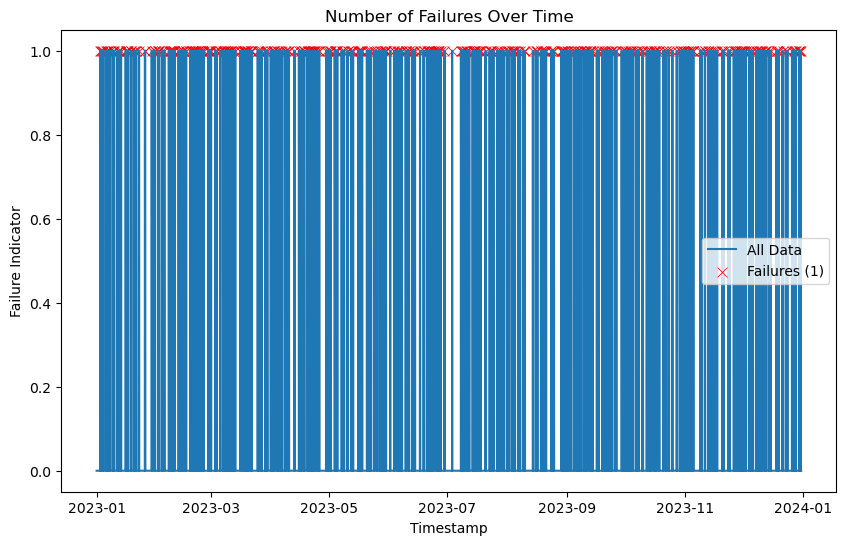

In [27]:
energy['Timestamp'] = pd.to_datetime(energy['Timestamp'])

# Filter data for failures (Failure_Indicator = 1)
failures = energy[energy['Failure_Indicator'] == 1]

# Plot the number of failures over time using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Timestamp', y='Failure_Indicator', data=energy, label='All Data')
sns.scatterplot(x='Timestamp', y='Failure_Indicator', data=failures, color='red', label='Failures (1)', marker='x', s=50)
plt.title('Number of Failures Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Failure Indicator')
plt.legend()
plt.show()


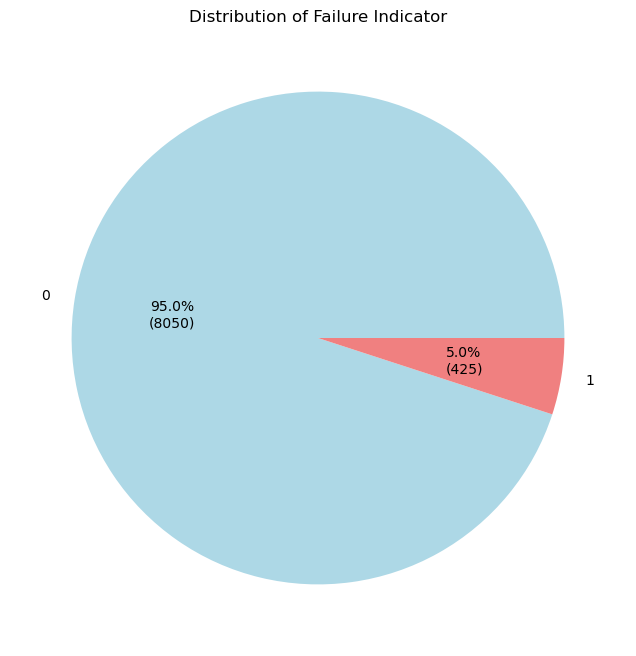

In [28]:
# Assuming 'Failure_Indicator' is the column indicating failures (0 or 1)
failure_counts = energy['Failure_Indicator'].value_counts()

# Plotting a pie chart with counts and percentages
plt.figure(figsize=(8, 8))
plt.pie(failure_counts, labels=failure_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(failure_counts) / 100),
        colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Failure Indicator')
plt.show()


In [29]:
# Create a new column 'Time' containing only the time
energy['Time'] = energy['Timestamp'].dt.time

# Display the DataFrame with the new 'Time' column
print(energy[['Timestamp', 'Time']])


               Timestamp      Time
0    2023-01-01 00:00:00  00:00:00
1    2023-01-01 01:00:00  01:00:00
2    2023-01-01 02:00:00  02:00:00
3    2023-01-01 03:00:00  03:00:00
4    2023-01-01 04:00:00  04:00:00
...                  ...       ...
8732 2023-12-30 20:00:00  20:00:00
8733 2023-12-30 21:00:00  21:00:00
8734 2023-12-30 22:00:00  22:00:00
8735 2023-12-30 23:00:00  23:00:00
8736 2023-12-31 00:00:00  00:00:00

[8475 rows x 2 columns]


In [30]:
energy['Time'].unique()

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [31]:
# Convert 'Time' column to timedelta
energy['Time'] = pd.to_timedelta(energy['Time'].astype(str))

In [32]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Sensor1            8475 non-null   float64        
 1   Sensor2            8475 non-null   float64        
 2   Sensor3            8475 non-null   float64        
 3   Temperature        8475 non-null   float64        
 4   Pressure           8475 non-null   float64        
 5   Vibration          8475 non-null   float64        
 6   Timestamp          8475 non-null   datetime64[ns] 
 7   Failure_Indicator  8475 non-null   int64          
 8   Average_Sensor     8475 non-null   float64        
 9   Time               8475 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), timedelta64[ns](1)
memory usage: 728.3 KB


### Correlation Matrix

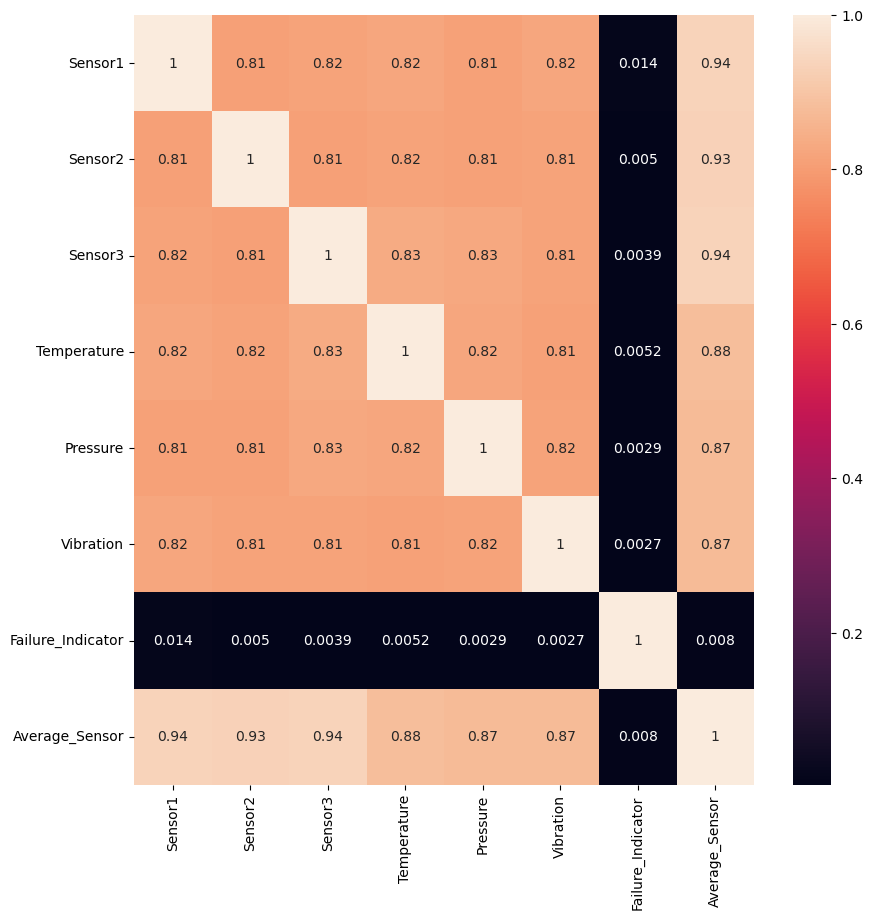

In [33]:
plt.figure(figsize = (10, 10))
sns.heatmap(energy.corr(), annot = True)
plt.show()

In [34]:
# Get the correlation matrix
correlation_matrix = energy.corr()

correlation_matrix

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Failure_Indicator,Average_Sensor
Sensor1,1.000000,0.807048,0.816426,0.821226,0.809797,0.821781,0.013640,0.935336
Sensor2,0.807048,1.000000,0.805995,0.816143,0.809128,0.813560,0.005050,0.931228
Sensor3,0.816426,0.805995,1.000000,0.834492,0.825913,0.813382,0.003854,0.936796
Temperature,0.821226,0.816143,0.834492,1.000000,0.820961,0.811489,0.005222,0.881842
Pressure,0.809797,0.809128,0.825913,0.820961,1.000000,0.816388,0.002893,0.872204
Vibration,0.821781,0.813560,0.813382,0.811489,0.816388,1.000000,0.002734,0.873447
Failure_Indicator,0.013640,0.005050,0.003854,0.005222,0.002893,0.002734,1.000000,0.008009
Average_Sensor,0.935336,0.931228,0.936796,0.881842,0.872204,0.873447,0.008009,1.000000


## Observation
#### Sensor Readings (Sensor1, Sensor2, Sensor3):
- There is a high positive correlation between Sensor1 and Sensor2 (0.807048).
- Sensor1 has a high positive correlation with Sensor3 (0.816426).
- Sensor2 and Sensor3 also exhibit a high positive correlation (0.805995).

#### Temperature and Other Variables:
- Temperature shows a relatively strong positive correlation with all sensor readings: Sensor1 (0.821226), Sensor2 (0.816143), Sensor3 (0.834492).
- The correlation between Temperature and Pressure is relatively strong (0.820961).
- Vibration has a moderate positive correlation with Temperature (0.811489).

#### Pressure and Other Variables:
- Pressure has high positive correlations with Sensor1 (0.809797), Sensor2 (0.809128), and Sensor3 (0.825913).

####    Vibration and Other Variables:
- Vibration shows a high positive correlation with Sensor1 (0.821781) and Sensor2 (0.813560), but slightly lower with Sensor3 (0.813382).
- Vibration has a moderate positive correlation with Temperature (0.811489).

#### Failure Indicator:
- The Failure Indicator shows very weak positive correlations with all other variables. This suggests that the sensor readings (Sensor1, Sensor2, Sensor3), Temperature, Pressure, and Vibration are not strongly correlated with the Failure Indicator.

# Seperating the data into two dataframes; one with the outlies only and the other without any outliers

In [35]:
def separate_outliers_iqr_all_columns(energy):
    energy_outliers_all = pd.DataFrame()  # DataFrame to store rows with outliers
    energy_no_outliers_all = pd.DataFrame()  # DataFrame to store rows without outliers

    for column in energy.columns:
        Q1 = energy[column].quantile(0.25)
        Q3 = energy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Rows with outliers
        energy_outliers_column = energy[(energy[column] < lower_bound) | (energy[column] > upper_bound)]
        energy_outliers_all = pd.concat([energy_outliers_all, energy_outliers_column])

        # Rows without outliers
        energy_no_outliers_column = energy[(energy[column] >= lower_bound) & (energy[column] <= upper_bound)]
        energy_no_outliers_all = pd.concat([energy_no_outliers_all, energy_no_outliers_column])

    return energy_outliers_all, energy_no_outliers_all

# Separate outliers for all columns
energy_outliers_all, energy_no_outliers_all = separate_outliers_iqr_all_columns(energy)


## Dataframe of The Outliers

In [36]:
energy_outliers_all.head()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator,Average_Sensor,Time
170,14.512825,6.989016,17.369908,16.906059,11.674119,5.339077,2023-08-01 02:00:00,0,12.957250,0 days 02:00:00
290,13.594907,10.581818,17.861777,7.126979,18.234510,14.599185,2023-01-13 02:00:00,0,14.012834,0 days 02:00:00
511,17.955788,7.756790,28.906974,12.584697,16.567647,18.762834,2023-01-22 07:00:00,0,18.206518,0 days 07:00:00
578,17.766904,12.547468,14.314498,13.308980,3.952769,14.908495,2023-01-25 02:00:00,0,14.876290,0 days 02:00:00
788,15.975932,11.783824,19.349186,23.559137,8.975015,14.742455,2023-02-02 20:00:00,0,15.702981,0 days 20:00:00


In [37]:
energy_outliers_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 170 to 8635
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Sensor1            1186 non-null   float64        
 1   Sensor2            1186 non-null   float64        
 2   Sensor3            1186 non-null   float64        
 3   Temperature        1186 non-null   float64        
 4   Pressure           1186 non-null   float64        
 5   Vibration          1186 non-null   float64        
 6   Timestamp          1186 non-null   datetime64[ns] 
 7   Failure_Indicator  1186 non-null   int64          
 8   Average_Sensor     1186 non-null   float64        
 9   Time               1186 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), timedelta64[ns](1)
memory usage: 101.9 KB


In [38]:
energy_outliers_all.describe()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Failure_Indicator,Average_Sensor,Time
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186
mean,12.057359,11.622640,12.834168,12.046498,11.497760,11.755853,0.397133,12.171389,0 days 11:38:54.232715008
std,6.898128,6.739175,7.436428,6.624471,6.339730,6.743603,0.489510,5.971512,0 days 06:57:03.479103777
min,-0.574625,-1.011907,-0.849483,-1.726179,-3.019938,-2.148714,0.000000,-0.149184,0 days 00:00:00
25%,6.444847,6.183107,6.422374,6.472676,6.267106,6.077876,0.000000,6.741531,0 days 05:00:00
50%,11.918565,10.898742,13.219887,12.549143,11.157611,11.794343,0.000000,13.809271,0 days 12:00:00
75%,17.616856,16.886226,18.376286,17.384922,17.176908,16.965908,1.000000,16.763042,0 days 18:00:00
max,28.996865,27.106647,29.403773,26.997956,25.053947,28.683961,1.000000,23.559884,0 days 23:00:00


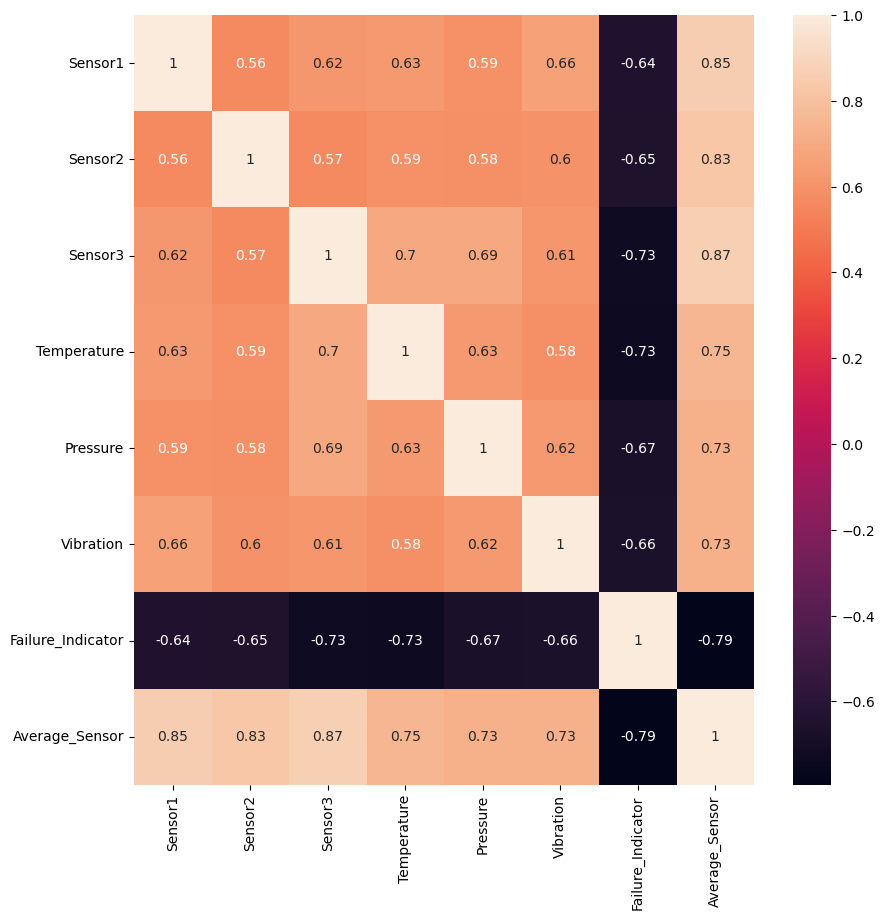

In [39]:
plt.figure(figsize = (10, 10))
sns.heatmap(energy_outliers_all.corr(), annot = True)
plt.show()

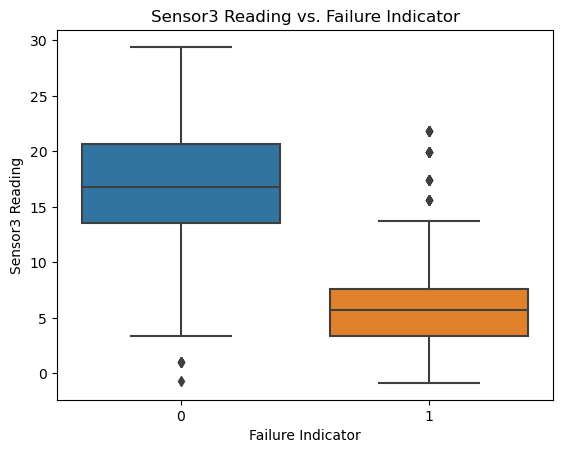

In [40]:
sns.boxplot(x='Failure_Indicator', y='Sensor3', data=energy_outliers_all)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor3 Reading')
plt.title('Sensor3 Reading vs. Failure Indicator')
plt.show()

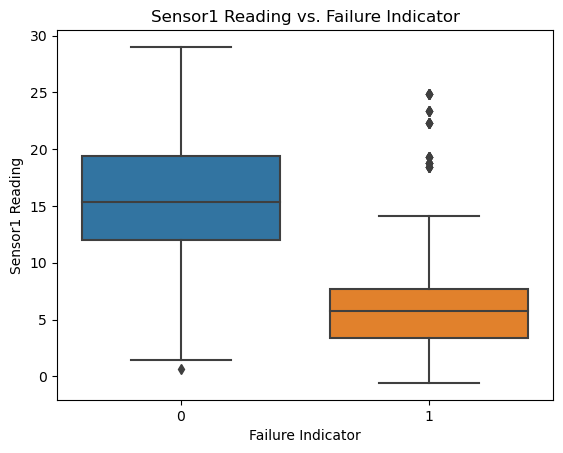

In [41]:
sns.boxplot(x='Failure_Indicator', y='Sensor1', data=energy_outliers_all)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor1 Reading')
plt.title('Sensor1 Reading vs. Failure Indicator')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to standardize 
columns_to_standardize = ['Sensor1', 'Sensor2', 'Sensor3', 'Temperature', 'Pressure', 'Vibration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply z-score standardization to the selected columns
energy_outliers_all[columns_to_standardize] = scaler.fit_transform(energy_outliers_all[columns_to_standardize])

# Display the standardized DataFrame
energy_outliers_all.head()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator,Average_Sensor,Time
170,0.356111,-0.687855,0.610193,0.733887,0.027830,-0.951937,2023-08-01 02:00:00,0,12.957250,0 days 02:00:00
290,0.222988,-0.154509,0.676364,-0.742941,1.063072,0.421812,2023-01-13 02:00:00,0,14.012834,0 days 02:00:00
511,0.855437,-0.573880,2.162273,0.081278,0.800038,1.039494,2023-01-22 07:00:00,0,18.206518,0 days 07:00:00
578,0.828044,0.137290,0.199149,0.190659,-1.190615,0.467698,2023-01-25 02:00:00,0,14.876290,0 days 02:00:00
788,0.568303,0.023928,0.876465,1.738629,-0.398094,0.443066,2023-02-02 20:00:00,0,15.702981,0 days 20:00:00


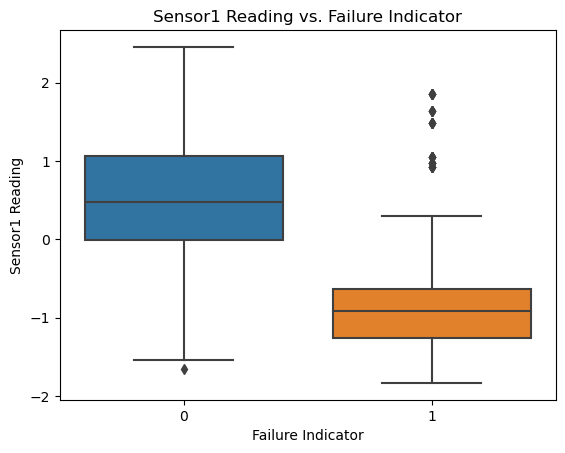

In [43]:
sns.boxplot(x='Failure_Indicator', y='Sensor1', data=energy_outliers_all)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor1 Reading')
plt.title('Sensor1 Reading vs. Failure Indicator')
plt.show()

## Dataframe Without The Outliers

In [44]:
energy_no_outliers_all.head()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator,Average_Sensor,Time
0,0.582781,-0.052198,0.733755,1.609097,-0.148087,-0.148070,2023-01-01 00:00:00,0,0.421446,0 days 00:00:00
1,1.666424,0.854646,-0.382263,0.629772,-0.376206,-0.378518,2023-01-01 01:00:00,0,0.712936,0 days 01:00:00
2,0.330318,-1.824924,-1.636562,-0.473931,-0.924475,0.402603,2023-01-01 02:00:00,0,-1.043722,0 days 02:00:00
3,-0.818523,-1.322803,1.555150,-0.136275,0.157029,-1.335247,2023-01-01 03:00:00,0,-0.195392,0 days 03:00:00
4,-0.453737,0.201568,-1.060348,0.466344,-0.509993,-0.201048,2023-01-01 04:00:00,0,-0.437506,0 days 04:00:00


In [45]:
energy_no_outliers_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83564 entries, 0 to 8736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Sensor1            83564 non-null  float64        
 1   Sensor2            83564 non-null  float64        
 2   Sensor3            83564 non-null  float64        
 3   Temperature        83564 non-null  float64        
 4   Pressure           83564 non-null  float64        
 5   Vibration          83564 non-null  float64        
 6   Timestamp          83564 non-null  datetime64[ns] 
 7   Failure_Indicator  83564 non-null  int64          
 8   Average_Sensor     83564 non-null  float64        
 9   Time               83564 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), timedelta64[ns](1)
memory usage: 7.0 MB


In [46]:
energy_no_outliers_all.describe()

,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Failure_Indicator,Average_Sensor,Time
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564
mean,5.098283,5.107882,5.115728,5.092437,5.105096,5.109222,0.045223,5.107298,0 days 11:29:19.030204394
std,2.650027,2.657213,2.689975,2.680984,2.649887,2.632459,0.207794,2.495034,0 days 06:55:00.121598506
min,-1.517032,-1.886621,-2.519942,-2.000383,-3.019938,-2.148714,0.000000,-1.043722,0 days 00:00:00
25%,3.060866,3.106245,3.083658,3.060672,3.074023,3.104630,0.000000,3.063912,0 days 05:00:00
50%,5.017957,5.036910,5.077870,5.050601,5.040696,5.025843,0.000000,5.054534,0 days 11:00:00
75%,6.985492,7.018920,6.973046,7.007618,7.033976,6.994136,0.000000,7.008001,0 days 17:00:00
max,28.996865,27.106647,29.403773,26.997956,25.053947,28.683961,1.000000,23.559884,0 days 23:00:00


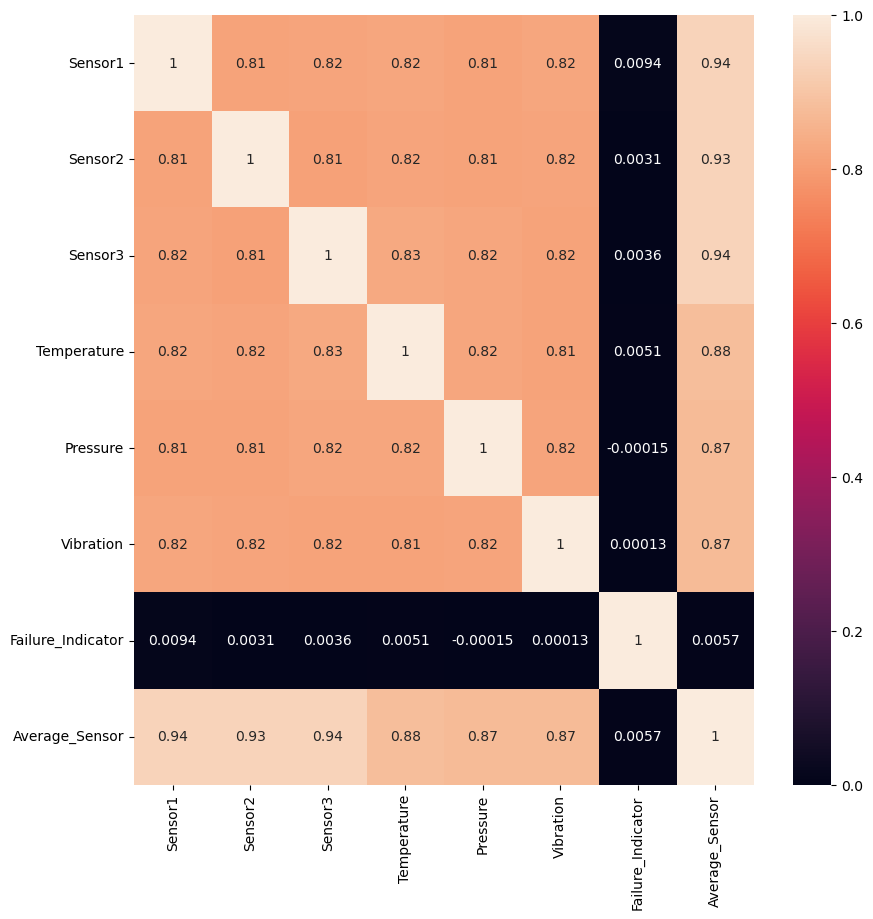

In [47]:
plt.figure(figsize = (10, 10))
sns.heatmap(energy_no_outliers_all.corr(), annot = True)
plt.show()

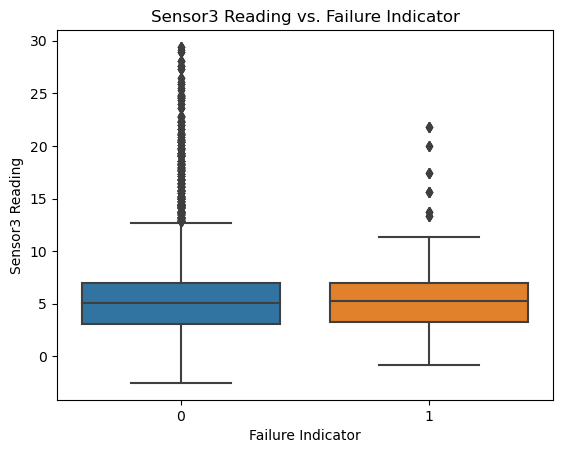

In [48]:
sns.boxplot(x='Failure_Indicator', y='Sensor3', data=energy_no_outliers_all)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor3 Reading')
plt.title('Sensor3 Reading vs. Failure Indicator')
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to standardize 
columns_to_standardize = ['Sensor1', 'Sensor2', 'Sensor3', 'Temperature', 'Pressure', 'Vibration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply z-score standardization to the selected columns
energy_no_outliers_all[columns_to_standardize] = scaler.fit_transform(energy_no_outliers_all[columns_to_standardize])

# Display the standardized DataFrame
energy_no_outliers_all.head()


,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator,Average_Sensor,Time
0,-1.703956,-1.941926,-1.629011,-1.299285,-1.982430,-1.997115,2023-01-01 00:00:00,0,0.421446,0 days 00:00:00
1,-1.295036,-1.600648,-2.043894,-1.664573,-2.068517,-2.084656,2023-01-01 01:00:00,0,0.712936,0 days 01:00:00
2,-1.799224,-2.609068,-2.510184,-2.076253,-2.275421,-1.787927,2023-01-01 02:00:00,0,-1.043722,0 days 02:00:00
3,-2.232748,-2.420101,-1.323656,-1.950308,-1.867286,-2.448094,2023-01-01 03:00:00,0,-0.195392,0 days 03:00:00
4,-2.095093,-1.846425,-2.295975,-1.725531,-2.119005,-2.017240,2023-01-01 04:00:00,0,-0.437506,0 days 04:00:00


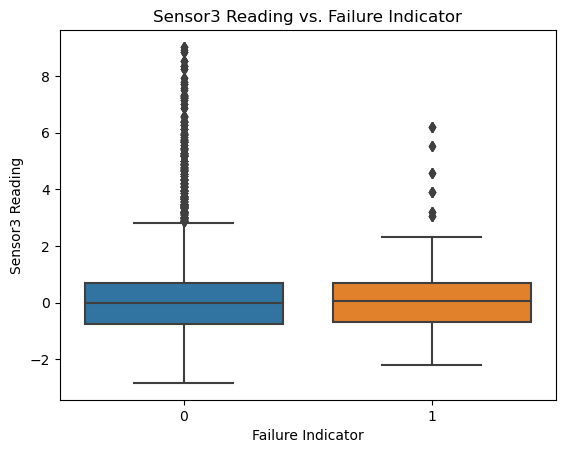

In [50]:
sns.boxplot(x='Failure_Indicator', y='Sensor3', data=energy_no_outliers_all)
plt.xlabel('Failure Indicator')
plt.ylabel('Sensor3 Reading')
plt.title('Sensor3 Reading vs. Failure Indicator')
plt.show()

## General Observation while dealing with the Outliers
- No matter the threshold we set for the data, even after normalizing the data that was split into two sections (for outliers & without outliers), there will always be a concentrated cluster, which will in turn make the other values become outliers. Therefore, we shall perform a two-step normalization. 

# Data Normalizing

In [51]:
# Select the columns you want to scale
columns_to_scale = ['Sensor1', 'Sensor2', 'Sensor3', 'Temperature', 'Pressure', 'Vibration']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
energy[columns_to_scale] = scaler.fit_transform(energy[columns_to_scale])

energy.head()


,Sensor1,Sensor2,Sensor3,Temperature,Pressure,Vibration,Timestamp,Failure_Indicator,Average_Sensor,Time
0,0.068815,0.063271,0.101921,0.124472,0.102296,0.064887,2023-01-01 00:00:00,0,0.421446,0 days 00:00:00
1,0.104328,0.094548,0.066962,0.090700,0.094170,0.057413,2023-01-01 01:00:00,0,0.712936,0 days 01:00:00
2,0.060541,0.002128,0.027672,0.052639,0.074641,0.082747,2023-01-01 02:00:00,0,-1.043722,0 days 02:00:00
3,0.022892,0.019447,0.127651,0.064283,0.113164,0.026383,2023-01-01 03:00:00,0,-0.195392,0 days 03:00:00
4,0.034846,0.072023,0.045721,0.085064,0.089405,0.063169,2023-01-01 04:00:00,0,-0.437506,0 days 04:00:00


In [52]:
energy = energy.drop(['Timestamp', 'Time'], axis=1)

# Data Spliting

In [53]:
X = energy.drop('Failure_Indicator', axis=1)
y = energy['Failure_Indicator']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#pip install imbalanced-learn

### Dealing with the imbalance in the data

In [56]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training and test sets
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Classification Model Selection

In [57]:
# note additional classifier was added aside earlier done

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
LR = LogisticRegression()
NB = GaussianNB()
XGB = XGBClassifier()
SGD = SGDClassifier()

In [59]:
# training the models 
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train, y_train)
NB.fit(X_train, y_train)
XGB.fit(X_train, y_train)
SGD.fit(X_train, y_train)

SGDClassifier()

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define classifiers
LR = LogisticRegression()
NB = GaussianNB()
XGB = XGBClassifier()
SGD = SGDClassifier()
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()


# Create a dictionary of classifiers
classifiers = {'LR': LR, 'NB': NB, 'XGB': XGB, 'SGD': SGD, 'SVM': SVM, 'RF': RF, 'KNN': KNN, 'DT': DT,}

# Now you can use the classifiers in the loop
f_list = {}
roc_list = {}

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    a_score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    
    # Store the results in dictionaries
    f_list[model_name] = f_score
    roc_list[model_name] = r_score

# Rest of your code
accuracy_list = {}
precision_list = {}
recall_list = {}
f_list = {}
roc_list = {}

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
   
    a_score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    
    accuracy_list[model_name] = [str(round(a_score * 100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score * 100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score * 100, 2)) + '%']
    f_list[model_name] = [str(round(f_score * 100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score * 100, 2)) + '%']
    
    print(f'\n{model_name}')
    print('Accuracy:', accuracy_list[model_name])
    print('Precision:', precision_list[model_name])
    print('Recall:', recall_list[model_name])
    print('F1-score:', f_list[model_name])
    print('AUC-ROC:', roc_list[model_name])
    
    if model_name != list(classifiers.keys())[-1]:
        print('')


LR
Accuracy: ['52.08%']
Precision: ['52.12%']
Recall: ['50.47%']
F1-score: ['51.28%']
AUC-ROC: ['52.08%']


NB
Accuracy: ['50.0%']
Precision: ['49.97%']
Recall: ['50.34%']
F1-score: ['50.15%']
AUC-ROC: ['50.0%']


XGB
Accuracy: ['87.64%']
Precision: ['84.15%']
Recall: ['92.73%']
F1-score: ['88.23%']
AUC-ROC: ['87.64%']


SGD
Accuracy: ['52.83%']
Precision: ['52.36%']
Recall: ['62.03%']
F1-score: ['56.79%']
AUC-ROC: ['52.83%']


SVM
Accuracy: ['49.5%']
Precision: ['49.45%']
Recall: ['47.73%']
F1-score: ['48.58%']
AUC-ROC: ['49.5%']


RF
Accuracy: ['92.76%']
Precision: ['91.45%']
Recall: ['94.34%']
F1-score: ['92.87%']
AUC-ROC: ['92.76%']


KNN
Accuracy: ['84.38%']
Precision: ['76.48%']
Recall: ['99.25%']
F1-score: ['86.39%']
AUC-ROC: ['84.39%']


DT
Accuracy: ['84.94%']
Precision: ['83.06%']
Recall: ['87.76%']
F1-score: ['85.34%']
AUC-ROC: ['84.94%']


In [61]:
# prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test)
y_pred7=XGB.predict(X_test)
y_pred8=SGD.predict(X_test)

Text(0.5, 1.0, 'SGD Classifier (SGD)')

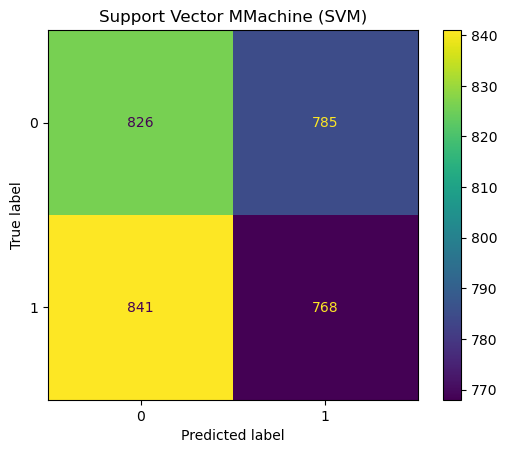

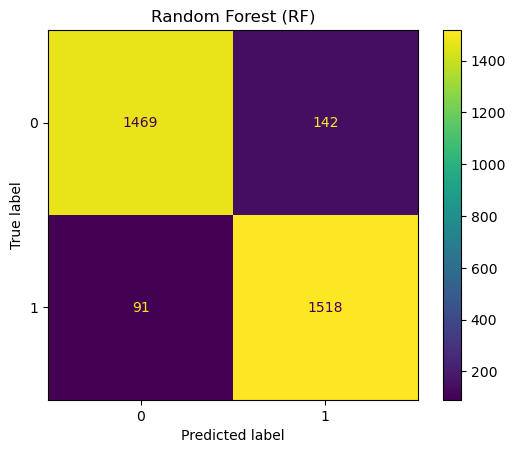

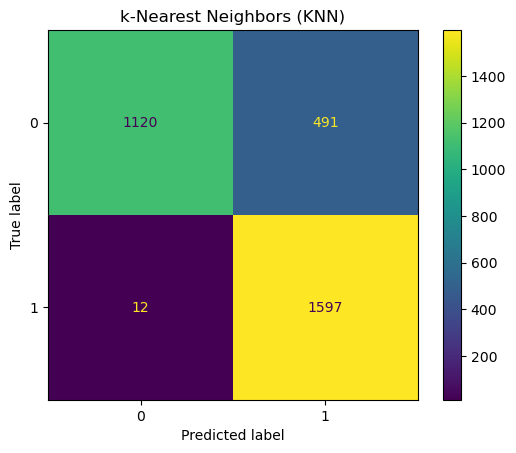

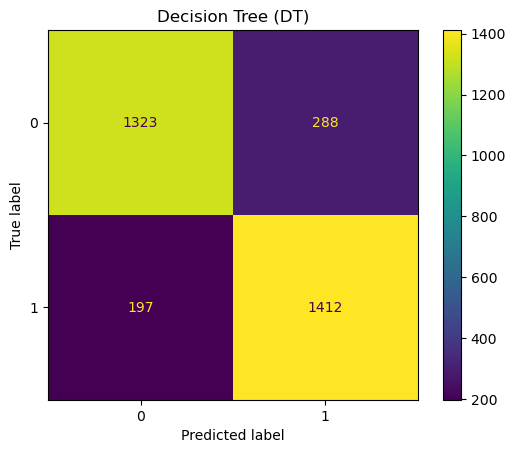

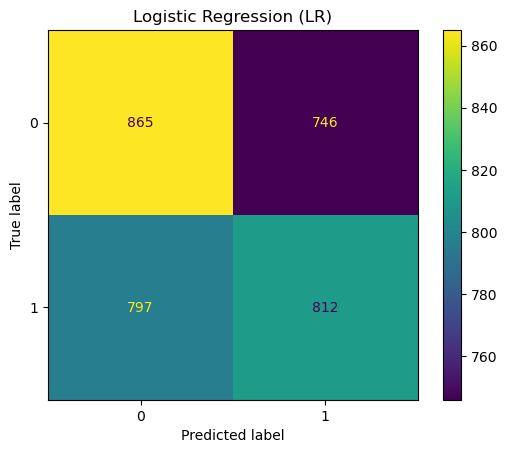

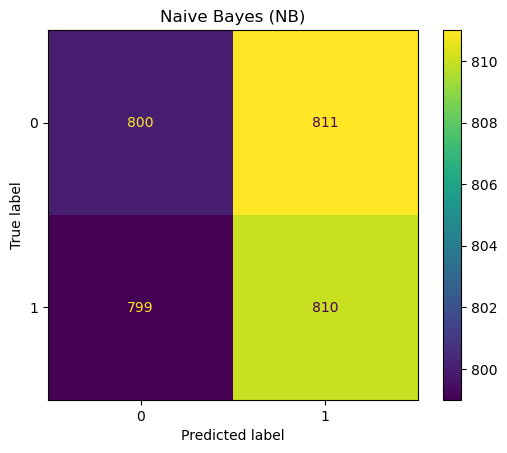

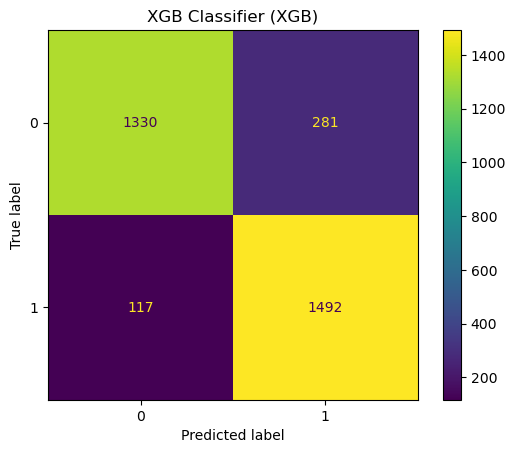

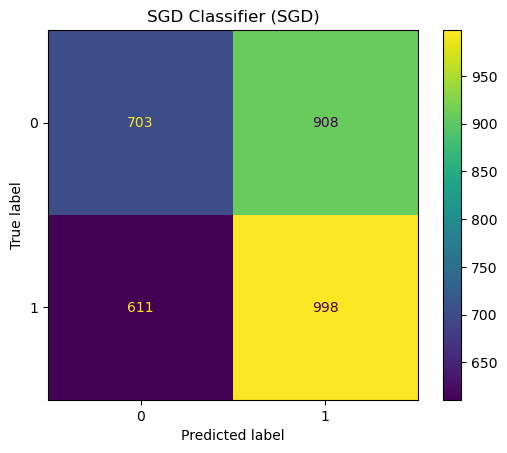

In [62]:
# Confusion matrics for all classifiers' predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("Support Vector MMachine (SVM)")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("Random Forest (RF)")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("k-Nearest Neighbors (KNN)")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("Decision Tree (DT)")

cm5 = confusion_matrix(y_test, y_pred5, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=LR.classes_)
disp.plot()
plt.title("Logistic Regression (LR)")

cm6 = confusion_matrix(y_test, y_pred6, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=NB.classes_)
disp.plot()
plt.title("Naive Bayes (NB)")

cm7 = confusion_matrix(y_test, y_pred7, labels=XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm7,display_labels=XGB.classes_)
disp.plot()
plt.title("XGB Classifier (XGB)")

cm8 = confusion_matrix(y_test, y_pred8, labels=SGD.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm8,display_labels=SGD.classes_)
disp.plot()
plt.title("SGD Classifier (SGD)")

In [63]:
# This takes the confusion matrix (cm) from the cell above and produces all evaluation matrix

def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
# calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
# calculate precision
    conf_precision = (TN / float(TN + FP))
# calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [64]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')
print('XGB metrics\n')
confusion_metrics(cm7)
print('\n\n')
print('SGD metrics\n')
confusion_metrics(cm8)
print('\n\n')

SVM metrics

True Positives: 768
True Negatives: 826
False Positives: 785
False Negatives: 841
--------------------------------------------------
Accuracy: 0.5
Mis-Classification: 0.5
Sensitivity: 0.48
Specificity: 0.51
Precision: 0.51
f_1 Score: 0.49



RF metrics

True Positives: 1518
True Negatives: 1469
False Positives: 142
False Negatives: 91
--------------------------------------------------
Accuracy: 0.93
Mis-Classification: 0.07
Sensitivity: 0.94
Specificity: 0.91
Precision: 0.91
f_1 Score: 0.93



KNN metrics

True Positives: 1597
True Negatives: 1120
False Positives: 491
False Negatives: 12
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.99
Specificity: 0.7
Precision: 0.7
f_1 Score: 0.82



DT metrics

True Positives: 1412
True Negatives: 1323
False Positives: 288
False Negatives: 197
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.88
Specificity: 0.82
Precision